In [2]:
import mimetypes

mimetypes.guess_type("../sample/README.md")

('text/markdown', None)

In [3]:
mimetypes.guess_type("/bin/ls")

(None, None)

In [5]:
import magic

magic.from_file("../sample/README.md")
magic.from_file("../sample/README.md", mime=True)

'text/plain'

In [8]:
magic.from_file("/bin/ls")

'Mach-O universal binary with 2 architectures: [x86_64:\\012- Mach-O 64-bit x86_64 executable, flags:<NOUNDEFS|DYLDLINK|TWOLEVEL|PIE>] [\\012- arm64e (caps: 0x2):\\012- Mach-O 64-bit arm64e (caps: PAC00) executable, flags:<NOUNDEFS|DYLDLINK|TWOLEVEL|PIE>]'

In [10]:
magic.from_buffer(open("/bin/ls", "rb").read())

'Mach-O universal binary with 2 architectures: [x86_64:\\012- Mach-O 64-bit x86_64 executable, flags:<NOUNDEFS|DYLDLINK|TWOLEVEL|PIE>] [\\012- arm64e (caps: 0x2):\\012- Mach-O 64-bit arm64e (caps: PAC00) executable, flags:<NOUNDEFS|DYLDLINK|TWOLEVEL|PIE>]'

In [14]:
def filetype_check(filepath):
    signature = [
        ["Executable and Linkable Format", 0, b"\x7f\x45\x4c\x46"],
        ["PDF document", 0, b"\x25\x50\x44\x46\x2d"],
        ["Mach-O 64-bit executable", 0, b"\xcf\xfa\xed\xfe"],
        ["Mach-O 32-bit executable", 0, b"\xce\xfa\xed\xfe"],
        ["Mach-O fat binary", 0, b"\xca\xfe\xba\xbe"],
        ["Mach-O fat binary (LE)", 0, b"\xbe\xba\xfe\xca"],
    ]
    with open(filepath, "rb") as f:
        head = f.read(12)
        for desc, offset, magic in signature:
            if head[offset : offset + len(magic)] == magic:
                return desc
    return "Unknown"

In [15]:
filetype_check("../sample/README.md")

'Unknown'

In [16]:
filetype_check("/bin/ls")

'Mach-O fat binary'

In [18]:
from magika import Magika
from pathlib import Path

m = Magika()

res = m.identify_path(Path("../sample/README.md"))
print(res)

MagikaResult(path=../sample/README.md, status=ok, prediction=MagikaPrediction(dl=ContentTypeInfo(label=markdown, mime_type='text/markdown', group='text', description='Markdown document', extensions=['md', 'markdown'], is_text=True), output=ContentTypeInfo(label=txt, mime_type='text/plain', group='text', description='Generic text document', extensions=['txt'], is_text=True), score=0.7201758027076721, overwrite_reason=<OverwriteReason.LOW_CONFIDENCE: 'low_confidence'>))


In [20]:
res = m.identify_path(Path("/bin/ls"))
print(res.prediction.output.label)

macho


In [ ]:
filepath = "liquid.bmp"

In [25]:
# Pillowモジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(filepath)

# 画像情報を表示する
print(img.format)
print(img.size)
print(img.mode)

BMP
(172, 132)
P


In [26]:
def dump(body):
    print("         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F")
    ascii = ""
    i = 0
    l = 0
    print(f"{l:08X}:", end="")
    for byte in body:
        print(f"{byte:02X} ", end="")
        if byte >= 0x20 and byte <= 0x7E:
            ascii += chr(byte)
        else:
            ascii += "."
        i += 1
        if i == 16:
            print(" ", ascii)
            ascii = ""
            i = 0
            l += 16
            print(f"{l:08X}:", end="")
    if i != 0:
        print("   " * (16 - i), end="")
        print(" ", ascii)


def dump2(filepath):
    with open(filepath, "rb") as f:
        body = f.read()
        dump(body)

In [27]:
dump2(filepath=filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 2C 3C 2D 00 8F 75 5F 00 4C B0   ......,<-..u_.L.
00000040:4C 00 A2 90 72 00 20 48 EA 00 93 7B C2 00 4E A1   L...r. H...{..N.
00000050:ED 00 A2 AC 92 00 FD A8 94 00 A0 E9 A0 00 FE DF   ................
00000060:AF 00 93 99 D1 00 C5 BA C3 00 97 CB C5 00 FE FE   ................
00000070:DB 00 00 00 00 00 99 99 99 99 99 99 99 99 99 99   ................
00000080:99 99 99 99 99 99 99 99 99 99 99 99 77 77 77 72   ............wwwr
00000090:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000A0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000B0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000C0:22 22 00 00 00 00 00 00

In [ ]:
import struct

struct.pack("<bhl", 1, 2, 3)

b'\x01\x02\x00\x03\x00\x00\x00'

In [28]:
import struct

struct.unpack(">bhl", b"\x01\x02\x00\x03\x00\x00\x00")

(1, 512, 50331648)

In [30]:
struct.pack("6s", b"test")

b'test\x00\x00'

In [31]:
struct.pack("6p", b"test")

b'\x04test\x00'

In [33]:
import struct

with open(filepath, "rb") as f:
    f_header = f.read(14)
    print(struct.unpack("<2sLHHL", f_header))
    i_header_size = struct.unpack("<l", f.read(4))[0]
    if i_header_size == 40:
        i_header = f.read(36)
        print(struct.unpack("<2L2H6L", i_header))
    else:
        print(i_header_size)

(b'BM', 11734, 0, 0, 118)
(172, 132, 1, 4, 0, 11616, 2834, 2834, 16, 16)


In [35]:
import struct

bmp_filepath = "liquid.bmp"
src_filepath = "../sample/README.md"
dst_filepath = "a.bmp"

# 元のBMPファイルからヘッダーと画像データを読み込む
with open(bmp_filepath, "rb") as f:
    body = f.read()
    f_header = struct.unpack("<2sIHHI", body[:14])
    img_offset = f_header[4]  # Pixel data offset

# 埋め込むファイルの内容を読み込む
with open(src_filepath, "rb") as f:
    src_body = f.read()

# 新しいBMPファイルとして保存（画像データ＋埋め込み）
with open(dst_filepath, "wb") as f:
    f.write(body[:img_offset])  # ヘッダー + 情報ヘッダー
    f.write(body[img_offset:])  # 元の画像データ
    f.write(src_body)  # 末尾に任意のデータを埋め込む

In [38]:
dump2(dst_filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 2C 3C 2D 00 8F 75 5F 00 4C B0   ......,<-..u_.L.
00000040:4C 00 A2 90 72 00 20 48 EA 00 93 7B C2 00 4E A1   L...r. H...{..N.
00000050:ED 00 A2 AC 92 00 FD A8 94 00 A0 E9 A0 00 FE DF   ................
00000060:AF 00 93 99 D1 00 C5 BA C3 00 97 CB C5 00 FE FE   ................
00000070:DB 00 00 00 00 00 99 99 99 99 99 99 99 99 99 99   ................
00000080:99 99 99 99 99 99 99 99 99 99 99 99 77 77 77 72   ............wwwr
00000090:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000A0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000B0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000C0:22 22 00 00 00 00 00 00

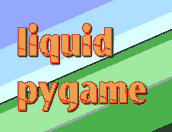

In [ ]:
# Pillowモジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(dst_filepath)

img

In [40]:
import struct

bmp_filepath = "liquid.bmp"  # 修正：正しいパス
src_filepath = "../sample/README.md"
dst_filepath = "a.bmp"

# BMPヘッダ解析と画像データ開始位置の取得
with open(bmp_filepath, "rb") as f:
    body = f.read()
    f_header = struct.unpack("<2sIHHI", body[:14])  # ファイルヘッダ
    img_offset = f_header[4]

# 埋め込みたいファイルの読み込み
with open(src_filepath, "rb") as f:
    src_body = f.read()

# 新しいBMPファイルとして保存（画像データ部分を空にし、README.mdを埋め込み）
with open(dst_filepath, "wb") as f:
    f.write(body[: 14 + 40])  # BMPヘッダ+情報ヘッダ（54バイト）
    f.write(b"\x00" * (img_offset - 54))  # パディング（画像データ開始位置まで）
    f.write(src_body)  # README.mdを画像データとして埋め込む

In [41]:
dump2(dst_filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000040:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000050:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000060:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000070:00 00 00 00 00 00 54 68 69 73 20 64 69 72 65 63   ......This direc
00000080:74 6F 72 79 20 69 6E 63 6C 75 64 65 73 20 61 20   tory includes a 
00000090:66 65 77 20 73 61 6D 70 6C 65 20 64 61 74 61 73   few sample datas
000000A0:65 74 73 20 74 6F 20 67 65 74 20 79 6F 75 20 73   ets to get you s
000000B0:74 61 72 74 65 64 2E 0A 0A 2A 20 20 20 60 63 61   tarted...*   `ca
000000C0:6C 69 66 6F 72 6E 69 61

In [42]:
# Pillowモジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(dst_filepath)

img

<PIL.BmpImagePlugin.BmpImageFile image mode=P size=172x132>

In [45]:
filepath = "roofline-analysis.png"

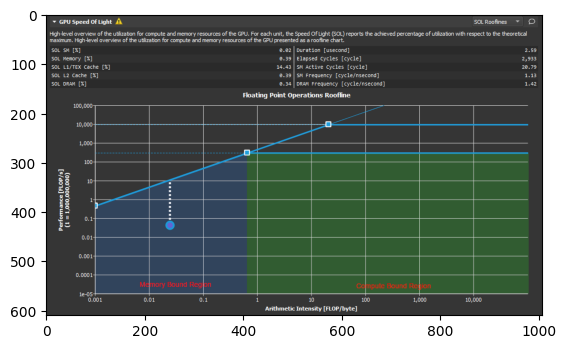

In [46]:
import cv2
import matplotlib.pyplot as plt

# 画像を読み込み
img = cv2.imread(filepath)

# 描画用にRGBに変換
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 画像を表示
plt.imshow(show_img)

In [47]:
from png import Reader

# PNGファイルを開く
with open(filepath, "rb") as f:
    # PNGリーダーを作成
    r = Reader(f)

    # ヘッダー情報を読み込む
    x = r.read()

    # メタ情報を表示
    print(f"Width: {x[0]}")
    print(f"Height: {x[1]}")
    print(f"info: {x[3]}")

Width: 1007
Height: 610
info: {'greyscale': False, 'alpha': True, 'planes': 4, 'bitdepth': 8, 'interlace': 0, 'size': (1007, 610), 'background': (2, 189, 8), 'physical': _Resolution(x=3780, y=3780, unit_is_meter=True)}


In [48]:
dump2(filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:89 50 4E 47 0D 0A 1A 0A 00 00 00 0D 49 48 44 52   .PNG........IHDR
00000010:00 00 03 EF 00 00 02 62 08 06 00 00 00 B6 23 F3   .......b......#.
00000020:97 00 00 22 8A 7A 54 58 74 52 61 77 20 70 72 6F   ...".zTXtRaw pro
00000030:66 69 6C 65 20 74 79 70 65 20 65 78 69 66 00 00   file type exif..
00000040:78 DA AD 9C 69 72 5C B9 B2 A4 FF 63 15 BD 04 CC   x...ir\....c....
00000050:C3 72 30 9A BD 1D F4 F2 FB 73 9C 24 99 A4 A8 7B   .r0......s.$...{
00000060:AB DA 5E A9 24 52 C9 4C 0C 31 78 B8 07 70 64 F6   ..^.$R.L.1x..pd.
00000070:FF FD 9F 63 FE 0F FF D5 16 A2 89 A9 D4 DC 72 B6   ...c..........r.
00000080:FC 17 5B 6C BE F3 4D B5 CF 7F ED FE E9 6C BC 7F   ..[l..M......l..
00000090:DE FF F6 B1 E1 F5 EA B7 D7 4D F6 D6 DF EF 3C 2F   .........M....</
000000A0:E9 2D CF DB 6C E9 CF 57 D7 79 3D 7D 7D E0 63 0E   .-..l..W.y=}}.c.
000000B0:37 BE BF 6E EA EB 27 BE BE 06 7A FD E0 63 C0 A0   7..n..'...z..c..
000000C0:99 35 D5 7A 5F 24 AF FB

In [49]:
import struct
import binascii

chunks = []
with open(filepath, "rb") as f:
    signature = f.read(8)

    while True:
        length, name = struct.unpack(">L4s", f.read(8))
        data = f.read(length)
        CRC = struct.unpack(">L", f.read(4))[0]
        chunks.append([length, name, data, CRC])
        if name == b"IEND":
            break

for chunk in chunks:
    crc = binascii.crc32(chunk[1] + chunk[2])
    print(f"{chunk[1]}: {chunk[0]} byte, CRC32:{chunk[3]:08X},{crc:08X}")

b'IHDR': 13 byte, CRC32:B623F397,B623F397
b'zTXt': 8842 byte, CRC32:47F32BA6,47F32BA6
b'iCCP': 389 byte, CRC32:97769273,97769273
b'bKGD': 6 byte, CRC32:40DE0D6E,40DE0D6E
b'pHYs': 9 byte, CRC32:952B0E1B,952B0E1B
b'tIME': 7 byte, CRC32:E46C8621,E46C8621
b'IDAT': 8192 byte, CRC32:64251E24,64251E24
b'IDAT': 8192 byte, CRC32:97964230,97964230
b'IDAT': 8192 byte, CRC32:64BAACEB,64BAACEB
b'IDAT': 8192 byte, CRC32:979B1574,979B1574
b'IDAT': 8192 byte, CRC32:E8D90928,E8D90928
b'IDAT': 4419 byte, CRC32:64A163D7,64A163D7
b'IEND': 0 byte, CRC32:AE426082,AE426082


In [50]:
for chunk in chunks:
    if chunk[1] == b"IHDR":
        header = struct.unpack(">2L5B", chunk[2])
        print(f"Width: {header[0]}")
        print(f"Height: {header[1]}")
        print(f"Bit depth: {header[2]}")
        print(f"Color type: {header[3]}, ", end="")
        if header[3] == 0:
            print("Grayscale")
        elif header[3] == 2:
            print("RGB")
        elif header[3] == 3:
            print("Palette index")
        elif header[3] == 4:
            print("Grayscale with alpha")
        elif header[3] == 6:
            print("RGB with alpha")
        else:
            print("Unknown")
        print(f"Compression method: {header[4]}")
        print(f"Filter method: {header[5]}")
        print(f"Interlace method: {header[6]}")

Width: 1007
Height: 610
Bit depth: 8
Color type: 6, RGB with alpha
Compression method: 0
Filter method: 0
Interlace method: 0
